In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import itertools
import matplotlib.ticker as mticker
from scipy.optimize import brentq, curve_fit
from mpmath import zeta
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from matplotlib.ticker import (LinearLocator, MaxNLocator)

font = {'weight': 'normal', 'family': 'DejaVu Sans'}
plt.rc('text', usetex = True)
plt.rc('font', **font)
plt.rcParams['font.size'] = 24

def func(x, a):
    return a*x

def format_power(x):
    
    power = int("{:.2e}".format(x).split('e')[1])
    val = float("{:.2e}".format(x).split('e')[0])
    
    return r'%.2f \cdot 10^{%d}' % (val, power)

def load_data_pdiag(mu, dim):
    
    data = np.load('mu=%s_d=%d/gen_diag_nonmarkov_data.npz' % (mu, dim), 
                    allow_pickle = True)
    
    sigvPCN = data['sigvPCN'].flatten()
    sigvMCPC = data['sigvMCPC'].flatten()
    sigvMCPCbis = data['sigvMCPCbis'].flatten()
    phiar = data['phiar']
    thr = 0.02

    nansigvMCPC = np.isnan(sigvMCPC)
    nansigvMCPCbis = np.isnan(sigvMCPCbis)
    nansigvPCN = np.isnan(sigvPCN)

    sigvMCPC = sigvMCPC[~nansigvMCPC]
    sigvMCPCbis = sigvMCPCbis[~nansigvMCPCbis]
    sigvPCN = sigvPCN[~nansigvPCN]

    phiarMCPC = phiar[~nansigvMCPC]
    phiarMCPCbis = phiar[~nansigvMCPCbis]
    phiarPCN = phiar[~nansigvPCN]

    mcpc = np.concatenate((sigvMCPC, sigvMCPCbis, sigvPCN[phiarPCN <= 0.02]))
    phi_mcpc = np.concatenate((phiarMCPC, phiarMCPCbis, phiarPCN[phiarPCN <= 0.02]))

    argsrt = np.argsort(mcpc).flatten()
    mcpc = mcpc[argsrt]
    phi_mcpc = phi_mcpc[argsrt]

    pcn = sigvPCN
    phi_pcn = phiarPCN

    p = np.poly1d(np.polyfit(np.log(mcpc), np.log(phi_mcpc), 5))

    return (mcpc, np.exp(p(np.log(mcpc))), pcn, phi_pcn,
            data['nu'], data['kappa'], data['gamma'])

def save_fig(figs, figname):

    
    if (type(figs) is list):
        for q, fig in enumerate(figs):
            fig.savefig('%s_%d.svg' % (figname, q), bbox_inches = 'tight')
            fig.savefig('%s_%d.pdf' % (figname, q), bbox_inches = 'tight')
            fig.savefig('%s_%d.png' % (figname, q), bbox_inches = 'tight', dpi = 300)
    else:
        figs.savefig('%s.svg' % (figname), bbox_inches = 'tight')
        figs.savefig('%s.pdf' % (figname), bbox_inches = 'tight')
        figs.savefig('%s.png' % (figname), bbox_inches = 'tight', dpi = 300)

def set_size(w,h,ax):
    Bbox = ax.get_position()
        
    l = Bbox.x0
    r = Bbox.x1
    t = Bbox.y1
    b = Bbox.y0

    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
    
    

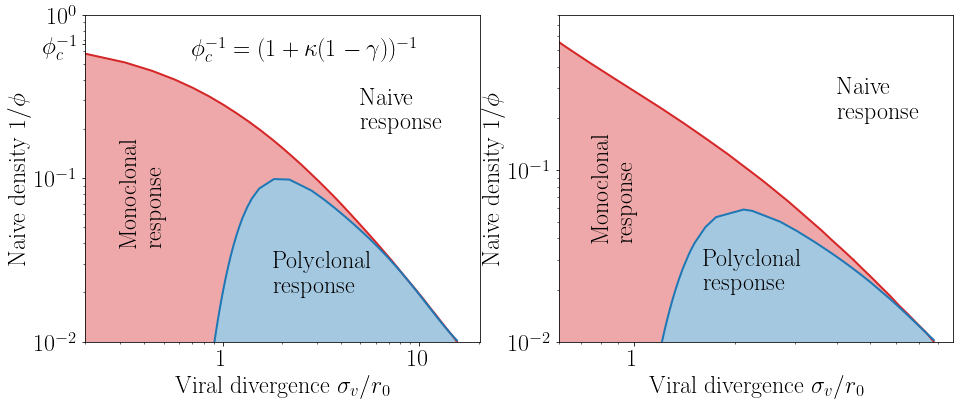

In [3]:

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)
set_size(5.48, 4.54, ax1)

(mcpc, phi_mcpc, pcn, phi_pcn, 
 nu, kappa, gamma) = load_data_pdiag(0, 2)

ax1.plot(pcn, phi_pcn, 'C3-', linewidth = 2)
ax1.plot(mcpc, phi_mcpc, 'C0-', linewidth = 2)


ax1.fill_between(pcn, phi_pcn, 0, color = 'C3', alpha = 0.4)
ax1.fill_between(mcpc, phi_mcpc, 0, color = 'w')
ax1.fill_between(mcpc, phi_mcpc, 0, color = 'C0', alpha = 0.4)

ax1.set_xscale('log')
ax1.set_yscale('log')


ax1.set_ylabel(r'Naive density $1/\phi$')
ax1.set_xlabel(r'Viral divergence $\sigma_v/r_0$')

ax1.text(0.3, 0.04, 'Monoclonal\nresponse', 
             rotation = 90)
ax1.text(1.8, 0.02, 'Polyclonal\nresponse')
ax1.text(5, 0.2, 'Naive\n response')
ax1.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

fig.canvas.draw()

yticks = list(ax1.get_yticks())
yticks_labels = [w.get_text() for w in ax1.get_yticklabels()]

yticks_labels += [r'$\phi_c^{-1}$']
yticks += [1/(1 + kappa*(1 - gamma))]

ax1.set_yticks(yticks)
ax1.set_yticklabels(yticks_labels)
ax1.set_ylim(ymin = 0.01, ymax = 1)
ax1.set_xlim(xmin = 0.2)
ax1.annotate(r'$\phi_c^{-1} = (1 + \kappa(1 - \gamma))^{-1}$', (0.7, 1/(1 + kappa*(1 - gamma)) - 0.1))
             
(mcpc, phi_mcpc, pcn, phi_pcn, 
 nu, kappa, gamma) = load_data_pdiag(0.5, 3)

ax2.plot(pcn, phi_pcn, 'C3-', linewidth = 2)
ax2.plot(mcpc, phi_mcpc, 'C0-', linewidth = 2)


ax2.fill_between(pcn, phi_pcn, 0, color = 'C3', alpha = 0.4)
ax2.fill_between(mcpc, phi_mcpc, 0, color = 'w')
ax2.fill_between(mcpc, phi_mcpc, 0, color = 'C0', alpha = 0.4)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim(ymin = 0.01)
ax2.set_xlim(xmin = 0.6)

ax2.set_ylabel(r'Naive density $1/\phi$')
ax2.set_xlabel(r'Viral divergence $\sigma_v/r_0$')

ax2.text(0.75, 0.04, 'Monoclonal\nresponse', 
             rotation = 90)
ax2.text(1.6, 0.02, 'Polyclonal\nresponse')
ax2.text(4, 0.2, 'Naive\n response')
ax2.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

save_fig(fig, 'figS0')

plt.show()
